<a href="https://colab.research.google.com/github/gabilodeau/INF6804/blob/master/OpticalFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INF6804 Vision par ordinateur

Polytechnique Montréal

Flot optique par deux méthodes différentes

Exécuter les 2 lignes suivantes pour colab.

In [1]:
!git clone https://github.com/gabilodeau/INF6804
%cd INF6804

Cloning into 'INF6804'...
remote: Enumerating objects: 137, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 302 (delta 66), reused 26 (delta 7), pack-reused 165
Receiving objects: 100% (302/302), 32.11 MiB | 31.65 MiB/s, done.
Resolving deltas: 100% (128/128), done.
/content/INF6804


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Lecture des images en entrée. (Images provenant PETS 2006, http://www.cvg.reading.ac.uk/PETS2006/data.html)

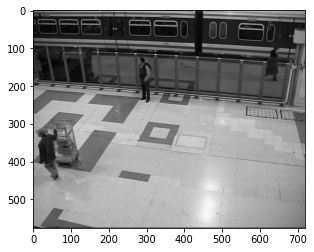

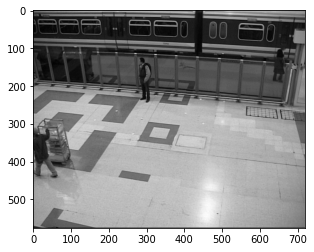

In [4]:
image1 = (cv2.imread('images/in000235.jpg',cv2.IMREAD_GRAYSCALE))
plt.imshow(image1, cmap = plt.get_cmap('gray'))
plt.show()
image2 = (cv2.imread('images/in000240.jpg',cv2.IMREAD_GRAYSCALE))
plt.imshow(image2, cmap = plt.get_cmap('gray'))
plt.show()

Par la méthode de Lucas et Kanade. Flot optique épars.

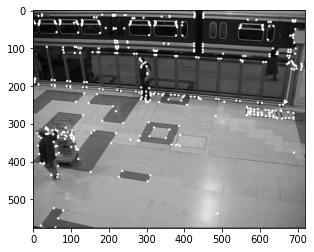

In [5]:
# Extraction de coins. On calculera le flux optique pour les coins.
corners1 = cv2.goodFeaturesToTrack(image1, maxCorners = 2000, qualityLevel = 0.1, minDistance = 3, blockSize = 5 )

temp = np.int32(corners1)
img = np.copy(image1)
for i in range(0, len(corners1)):
    cv2.circle(img,(temp[i,0,0],temp[i,0,1]),3,255,-1)

plt.imshow(img, cmap = plt.get_cmap('gray'))
plt.show()

On cherche le déplacement des coins.

In [6]:
corners2, st, err = cv2.calcOpticalFlowPyrLK(image1, image2, corners1, None, winSize  = (15,15), maxLevel = 0, 
                                       criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

Affichage des déplacements. On obtient un vecteur de déplacement par coins.

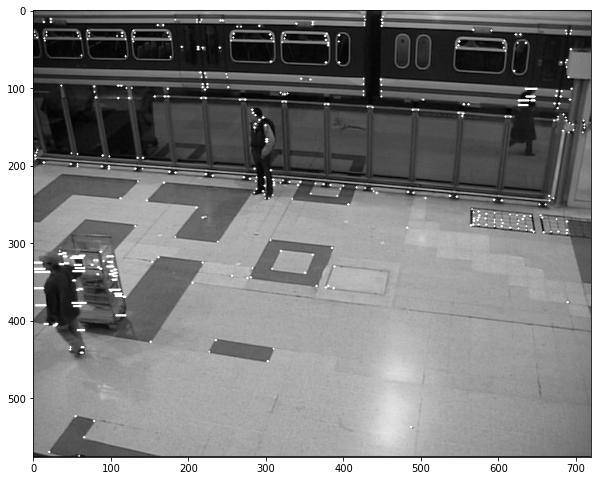

In [7]:
fig1 = plt.figure(figsize = (10,10))
temp1 = np.int32(corners1)
temp2 = np.int32(corners2)
img = np.copy(image1)
for i in range(0, len(corners1)):
    cv2.line(img, (temp1[i,0,0],temp1[i,0,1]),(temp2[i,0,0],temp1[i,0,1]), 255, 2)
plt.imshow(img, cmap = plt.get_cmap('gray'))
plt.show()

Par la méthode de Farneback. Flot optique dense.

In [8]:
# Pour tous les pixels de l'image
flot = cv2.calcOpticalFlowFarneback(image1,image2, None, 0.5, 3, 15, 3, 5, 1.2, 0)

Affichage du déplacement de tous les pixels de l'image. Donc, un vecteur de déplacement par pixel.

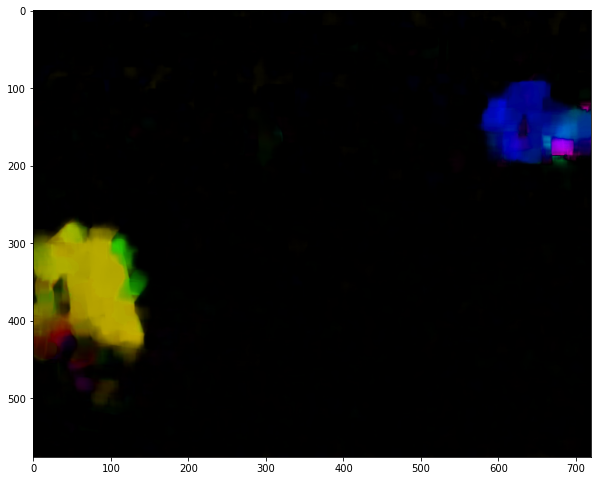

In [9]:
fig2 = plt.figure(figsize = (10,10))
hsv = np.zeros((len(image1),len(image1[0]),3))
hsv[...,1] = 255
mag, ang = cv2.cartToPolar(flot[...,0], flot[...,1])
hsv[...,0] = ang*180/np.pi/2
hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
bgr = cv2.cvtColor(np.uint8(hsv),cv2.COLOR_HSV2BGR)
plt.imshow(bgr)
plt.show()